<a href="https://colab.research.google.com/github/jefbags/DS504/blob/master/COLAB_Data_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Modeling

### Import

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.inspection import permutation_importance
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import recall_score,precision_score
sns.set_style("whitegrid")

import io

!pip install scikit-plot
import scikitplot as skplt
#https://github.com/reiinakano/scikit-plot

## Load the data and train_test_split

In [18]:
# Only for new file!
#from google.colab import files 


#uploaded = files.upload()

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
# For new file..
#io.StringIO(uploaded["PROJ_DF.csv"].decode("utf-8"))
#df = pd.read_csv(io.StringIO(uploaded["PROJ_DF.csv"].decode("utf-8")))

# Already uploaded, just open it!
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PROJ_DF.csv')


In [89]:
pd.set_option('display.max.columns', None)
df.head()

,Unnamed: 0,CASENUM,MAXSEV_IM,SEV_ACC,CF_3,CF_5,CF_7,CF_12,CF_13,CF_14,CF_15,CF_16,CF_17,CF_19,CF_20,CF_21,CF_23,CF_24,CF_25,CF_26,CF_27,CF_28,STRATUM_2,STRATUM_3,STRATUM_4,STRATUM_5,STRATUM_6,STRATUM_7,STRATUM_8,STRATUM_9,STRATUM_10,LGTCON_IM_1,LGTCON_IM_2,LGTCON_IM_3,LGTCON_IM_4,LGTCON_IM_5,LGTCON_IM_6,LGTCON_IM_7,EVENT1_IM_1,EVENT1_IM_2,EVENT1_IM_3,EVENT1_IM_5,EVENT1_IM_6,EVENT1_IM_7,EVENT1_IM_8,EVENT1_IM_9,EVENT1_IM_10,EVENT1_IM_11,EVENT1_IM_12,EVENT1_IM_14,EVENT1_IM_15,EVENT1_IM_16,EVENT1_IM_17,EVENT1_IM_18,EVENT1_IM_19,EVENT1_IM_20,EVENT1_IM_21,EVENT1_IM_23,EVENT1_IM_24,EVENT1_IM_25,EVENT1_IM_26,EVENT1_IM_30,EVENT1_IM_31,EVENT1_IM_32,EVENT1_IM_33,EVENT1_IM_34,EVENT1_IM_35,EVENT1_IM_38,EVENT1_IM_39,EVENT1_IM_40,EVENT1_IM_41,EVENT1_IM_42,EVENT1_IM_43,EVENT1_IM_44,EVENT1_IM_45,EVENT1_IM_46,EVENT1_IM_48,EVENT1_IM_49,EVENT1_IM_50,EVENT1_IM_51,EVENT1_IM_52,EVENT1_IM_53,EVENT1_IM_54,EVENT1_IM_55,EVENT1_IM_57,EVENT1_IM_58,EVENT1_IM_59,EVENT1_IM_72,EVENT1_IM_73,EVENT1_IM_74,EVENT1_IM_91,EVENT1_IM_93,TYP_INT_1,TYP_INT_2,TYP_INT_3,TYP_INT_4,TYP_INT_5,TYP_INT_6,TYP_INT_7,TYP_INT_10,REL_ROAD_1,REL_ROAD_2,REL_ROAD_3,REL_ROAD_4,REL_ROAD_5,REL_ROAD_6,REL_ROAD_7,REL_ROAD_8,REL_ROAD_10,REL_ROAD_11,REL_ROAD_12,WRK_ZONE_0,WRK_ZONE_1,WRK_ZONE_2,WRK_ZONE_3,WRK_ZONE_4,WEATHR_IM_1,WEATHR_IM_2,WEATHR_IM_3,WEATHR_IM_4,WEATHR_IM_5,WEATHR_IM_6,WEATHR_IM_7,WEATHR_IM_8,WEATHR_IM_10,WEATHR_IM_11,WEATHR_IM_12,ALCHL_IM_1,ALCHL_IM_2,REGION_1,REGION_2,REGION_3,REGION_4,URBANICITY_1,URBANICITY_2,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WKDY_IM_1,WKDY_IM_2,WKDY_IM_3,WKDY_IM_4,WKDY_IM_5,WKDY_IM_6,WKDY_IM_7,OLD_CAR,SPD_L30MPH,SPD_30_65MPH,SPD_G65MPH,BDYTYP_IM_1,BDYTYP_IM_2,BDYTYP_IM_3,BDYTYP_IM_4,BDYTYP_IM_5,BDYTYP_IM_6,BDYTYP_IM_7,BDYTYP_IM_8,BDYTYP_IM_9,BDYTYP_IM_10,BDYTYP_IM_11,BDYTYP_IM_12,BDYTYP_IM_13,BDYTYP_IM_14,BDYTYP_IM_15,BDYTYP_IM_16,BDYTYP_IM_17,BDYTYP_IM_19,BDYTYP_IM_20,BDYTYP_IM_21,BDYTYP_IM_22,BDYTYP_IM_28,BDYTYP_IM_29,BDYTYP_IM_30,BDYTYP_IM_31,BDYTYP_IM_32,BDYTYP_IM_34,BDYTYP_IM_39,BDYTYP_IM_40,BDYTYP_IM_41,BDYTYP_IM_42,BDYTYP_IM_45,BDYTYP_IM_48,BDYTYP_IM_50,BDYTYP_IM_51,BDYTYP_IM_52,BDYTYP_IM_55,BDYTYP_IM_58,BDYTYP_IM_59,BDYTYP_IM_60,BDYTYP_IM_61,BDYTYP_IM_62,BDYTYP_IM_63,BDYTYP_IM_64,BDYTYP_IM_65,BDYTYP_IM_66,BDYTYP_IM_67,BDYTYP_IM_71,BDYTYP_IM_72,BDYTYP_IM_73,BDYTYP_IM_78,BDYTYP_IM_80,BDYTYP_IM_81,BDYTYP_IM_82,BDYTYP_IM_83,BDYTYP_IM_84,BDYTYP_IM_85,BDYTYP_IM_86,BDYTYP_IM_87,BDYTYP_IM_88,BDYTYP_IM_89,BDYTYP_IM_90,BDYTYP_IM_91,BDYTYP_IM_92,BDYTYP_IM_93,BDYTYP_IM_94,BDYTYP_IM_95,BDYTYP_IM_96,BDYTYP_IM_97,SPEEDREL_0,SPEEDREL_2,SPEEDREL_3,SPEEDREL_4,SPEEDREL_5,VALIGN_0,VALIGN_1,VALIGN_2,VALIGN_3,VALIGN_4,VPROFILE_0,VPROFILE_1,VPROFILE_2,VPROFILE_3,VPROFILE_4,VPROFILE_5,VPROFILE_6,VSURCOND_0,VSURCOND_1,VSURCOND_2,VSURCOND_3,VSURCOND_4,VSURCOND_5,VSURCOND_6,VSURCOND_7,VSURCOND_8,VSURCOND_10,VSURCOND_11,PCRASH1_IM_0,PCRASH1_IM_1,PCRASH1_IM_2,PCRASH1_IM_3,PCRASH1_IM_4,PCRASH1_IM_5,PCRASH1_IM_6,PCRASH1_IM_7,PCRASH1_IM_8,PCRASH1_IM_9,PCRASH1_IM_10,PCRASH1_IM_11,PCRASH1_IM_12,PCRASH1_IM_13,PCRASH1_IM_14,PCRASH1_IM_15,PCRASH1_IM_16,PCRASH1_IM_17,PCRASH1_IM_98,DR_SF_6,DR_SF_8,DR_SF_9,DR_SF_10,DR_SF_16,DR_SF_18,DR_SF_20,DR_SF_21,DR_SF_22,DR_SF_23,DR_SF_24,DR_SF_32,DR_SF_36,DR_SF_37,DR_SF_50,DR_SF_51,DR_SF_54,DR_SF_55,DR_SF_56,DR_SF_57,DR_SF_58,DR_SF_59,DR_SF_60,DR_SF_91,IMPAIRED_NONE,IMPAIRED_BLACKOUT,IMPAIRED_ASLEEP,IMPAIRED_CANE,IMPAIRED_PARAPALEGIC,IMPAIRED_PREINJ,IMPAIRED_DEAF,IMPAIRED_BLIND,IMPAIRED_EMOTIONAL,IMPAIRED_DUI,IMPAIRED_PHY_UNK,IMPAIRED_NO_DRIVER,IMPAIRED_OTHER,age_L16,age_16_24,age_25_54,age_G55,SEX_IM_1,SEX_IM_2,REST_USE_0,REST_USE_1,REST_USE_2,REST_USE_3,REST_USE_4,REST_USE_5,REST_USE_7,REST_USE_8,REST_USE_10,REST_USE_11,REST_USE_12,REST_USE_16,REST_USE_17,REST_USE_19,REST_USE_20,REST_USE_29,REST_USE_96,REST_USE_97,REST_MIS_0,REST_MIS_1,DRUGS_0,DRUGS_1,MFACTOR_0,MFACTOR_1,MFACTOR_2,MFACTOR_3,MFACTOR_4,MFACTOR_5,MFACTOR_6,MFACTOR_7,MFACTOR_8,MFACTOR_9,MFACTOR_10,MFACTOR_11,MFACTOR

In [90]:
#What does the df look like?
df.shape

(149871, 380)

In [91]:
# How many severe accidents are there in this sample set?
df[df['SEV_ACC']==1].count()

Unnamed: 0     18655
CASENUM        18655
MAXSEV_IM      18655
SEV_ACC        18655
CF_3           18655
               ...  
MDRDSTRD_92    18655
MDRDSTRD_93    18655
MDRDSTRD_96    18655
MDRDSTRD_97    18655
MDRDSTRD_98    18655
Length: 380, dtype: int64

In [92]:
# Let's drop the accident severity column. It's kind of a dead give-a-away.
# Also, don't need unnamed, or stratum. How can we know what kind of accident it is beforehand??
# Finally, last few are included in dataset, but undefined in manual.  What are they??  Must drop...

df = df.drop(['MAXSEV_IM', 'CASENUM', 'Unnamed: 0', 'STRATUM_10', 'STRATUM_2', 'STRATUM_3', 'STRATUM_4', 'STRATUM_5', 'STRATUM_6', 'STRATUM_7', 'STRATUM_8', 'STRATUM_9', 'CF_12', 'REL_ROAD_12', 'WRK_ZONE_4'], axis=1)

In [93]:
# 'SEV_ACC' is the column we want to test on...

X = df.drop(['SEV_ACC'], axis=1)
y = df['SEV_ACC']

In [94]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [28]:
X_train.columns.get_loc("age_16_24")

296

In [29]:
#X_train[:, 0]

X_train.iloc[:,300]


88748     1
132361    1
35224     1
46143     0
17126     1
         ..
136271    1
62586     0
139315    1
139895    1
123708    1
Name: SEX_IM_2, Length: 100413, dtype: int64

(-0.05, 1.05, -0.05, 1.05)

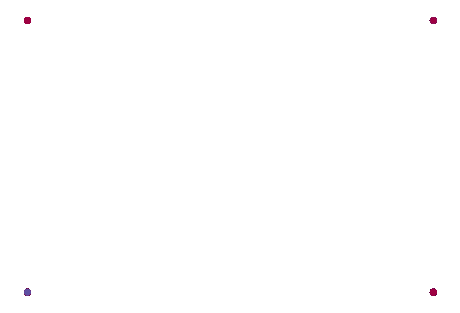

In [ ]:
plt.scatter(X_train.iloc[:, 296], X_train.iloc[:, 112], c=y_train, marker = 'o', s=40, cmap=plt.cm.Spectral)#c--color, s--size, the shape of the marker point
plt.axis('off')

In [ ]:
from yellowbrick.classifier import ClassPredictionError

0.8766225888632779

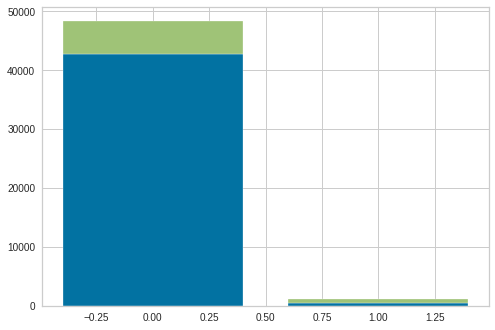

In [ ]:
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(RandomForestClassifier(random_state=42, n_estimators=10), classes=['MONTH_1', 'BDYTYP_IM_60'])

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
#visualizer.show()

# Random Forest - Feature Importance, Part 1

https://mljar.com/blog/feature-importance-in-random-forest/

In [ ]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [36]:
#plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'figure.figsize': (12.0, 15.0)})
plt.rcParams.update({'font.size': 14})

To get shap to work, needed to look here:
https://stackoverflow.com/questions/14585598/installing-numba-for-python

Specfically needed:
* sudo apt-get install build-essential
* sudo apt-get install llvm
* pip install llvmpy
* pip install cython
* pip install numba


Could not get llvmpy to install without erroring out though...

In [37]:
#rfc.feature_importances_

In [38]:
# summarize feature importance
for i,v in enumerate(rfc.feature_importances_):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00028
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00004
Feature: 4, Score: 0.00229
Feature: 5, Score: 0.00020
Feature: 6, Score: 0.00060
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00069
Feature: 9, Score: 0.00083
Feature: 10, Score: 0.00024
Feature: 11, Score: 0.00078
Feature: 12, Score: 0.00014
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00014
Feature: 15, Score: 0.00027
Feature: 16, Score: 0.00079
Feature: 17, Score: 0.01105
Feature: 18, Score: 0.00829
Feature: 19, Score: 0.00848
Feature: 20, Score: 0.00240
Feature: 21, Score: 0.00277
Feature: 22, Score: 0.00122
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00371
Feature: 25, Score: 0.00004
Feature: 26, Score: 0.00009
Feature: 27, Score: 0.00083
Feature: 28, Score: 0.00008
Feature: 29, Score: 0.00005
Feature: 30, Score: 0.00576
Feature: 31, Score: 0.00207
Feature: 32, Score: 0.00031
Feature: 33, Score: 0.00221
Feature: 34, Score: 0.00544
Feature: 35, Score: 0.00241
Fe

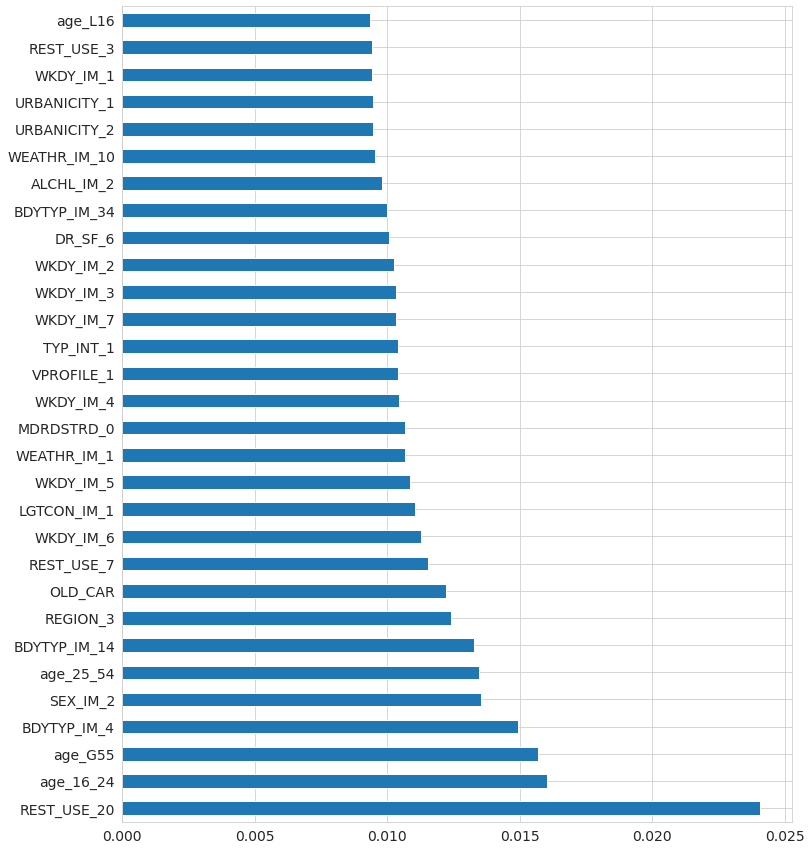

In [41]:
#feat_importances = rfc.feature_importances_
#plt.barh(X.columns, importances)
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)

feat_importances.nlargest(30).plot(kind='barh')

In [ ]:
important_features_dict = {}
for x,i in enumerate(rfc.feature_importances_):
    important_features_dict[x]=i

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

top100 = []
print ("The top 100 columns are:")
for i in important_features_list[:100]:
    top100.append(X.columns[i])
    print(X.columns[i])
#print (top100)

The top 20 columns are:
REST_USE_20
age_16_24
age_G55
BDYTYP_IM_4
age_25_54
BDYTYP_IM_14
SEX_IM_2
OLD_CAR
REGION_3
REST_USE_7
WKDY_IM_6
LGTCON_IM_1
WKDY_IM_5
MDRDSTRD_0
WEATHR_IM_1
DR_SF_6
WKDY_IM_3
TYP_INT_1
WKDY_IM_7
VPROFILE_1


In [ ]:
# Another option

#skplt.estimators.plot_feature_importances(rfc, top20)
#plt.show()

# Permutation Based Feature Importance

https://mljar.com/blog/feature-importance-in-random-forest/

In [16]:
# Let's start by defining it... 

perm_importance = permutation_importance(rfc, X_test, y_test)

KeyboardInterrupt: ignored

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()[:20]

plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# SHAP

https://mljar.com/blog/feature-importance-in-random-forest/

In [ ]:
!pip install shap

     |████████████████████████████████| 327kB 2.6MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456457 sha256=4ac008ae74e119722c7b57e22d915b31c817990d20e5b26f70275e6868bc966d
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, X_test)

# Remove columns based on analysis

The following were deemed unneeded for this project based on key feature analysis:
* First Harmful Event (EVENT_IM)
* Age
* Sex
* Region
* Month 
* Day of the Week



In [95]:
# Dropping more - TWEAKING

df = df.drop(['age_L16','age_16_24','age_25_54','age_G55'], axis=1)

df = df.loc[:, ~df.columns.str.startswith('EVENT')]
df = df.loc[:, ~df.columns.str.startswith('REGION')]
df = df.loc[:, ~df.columns.str.startswith('MONTH')]
df = df.loc[:, ~df.columns.str.startswith('SEX')]
df = df.loc[:, ~df.columns.str.startswith('WKDY')]


In [96]:
# re-implement train-test-split
X = df.drop(['SEV_ACC'], axis=1)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

# Random Forest - Feature Importance, Part 2

https://mljar.com/blog/feature-importance-in-random-forest/

In [98]:
# random forest model creation - again
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [84]:
#plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'figure.figsize': (12.0, 15.0)})
plt.rcParams.update({'font.size': 14})

To get shap to work, needed to look here:
https://stackoverflow.com/questions/14585598/installing-numba-for-python

Specfically needed:
* sudo apt-get install build-essential
* sudo apt-get install llvm
* pip install llvmpy
* pip install cython
* pip install numba


Could not get llvmpy to install without erroring out though...

In [ ]:
#rfc.feature_importances_

In [87]:
# summarize feature importance
#for i,v in enumerate(rfc.feature_importances_):
	#print('Feature: %0d, Score: %.5f' % (i,v))

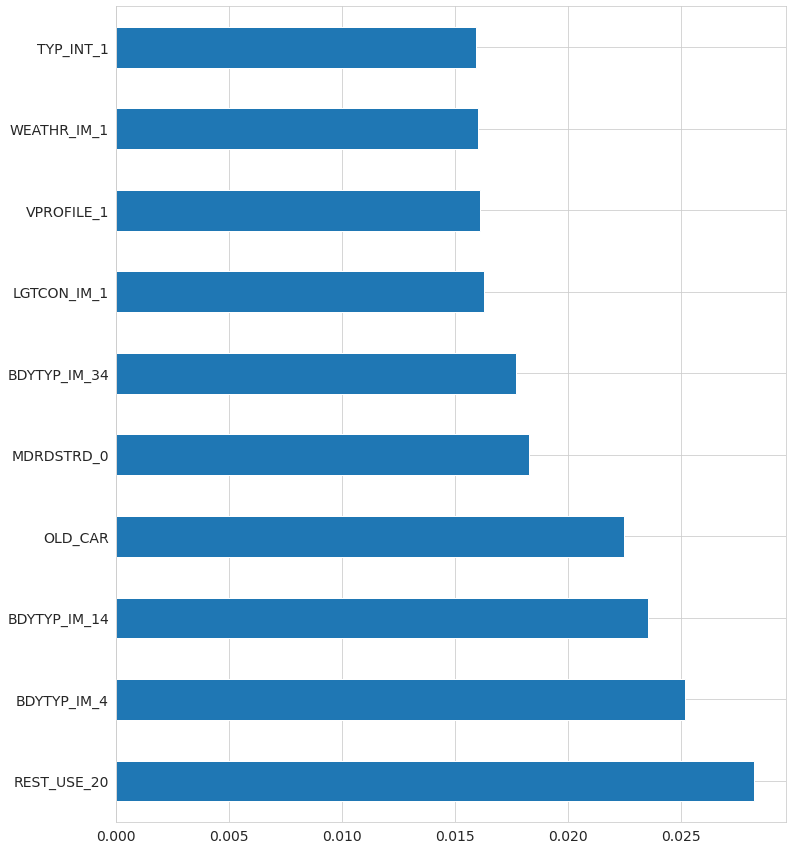

In [134]:
#feat_importances = rfc.feature_importances_
#plt.barh(X.columns, importances)
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)

feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
important_features_dict = {}
for x,i in enumerate(rfc.feature_importances_):
    important_features_dict[x]=i

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

top100 = []
print ("The top 100 columns are:")
for i in important_features_list[:100]:
    top100.append(X.columns[i])
    print(X.columns[i])
#print (top100)

The top 20 columns are:
REST_USE_20
age_16_24
age_G55
BDYTYP_IM_4
age_25_54
BDYTYP_IM_14
SEX_IM_2
OLD_CAR
REGION_3
REST_USE_7
WKDY_IM_6
LGTCON_IM_1
WKDY_IM_5
MDRDSTRD_0
WEATHR_IM_1
DR_SF_6
WKDY_IM_3
TYP_INT_1
WKDY_IM_7
VPROFILE_1


In [ ]:
# Another option

#skplt.estimators.plot_feature_importances(rfc, top20)
#plt.show()

# Models

## Random Forest Classifier

https://www.datacamp.com/community/tutorials/random-forests-classifier-python

https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

In [99]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [100]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [101]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[42394   786]
 [ 5440   838]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     43180
           1       0.52      0.13      0.21      6278

    accuracy                           0.87     49458
   macro avg       0.70      0.56      0.57     49458
weighted avg       0.84      0.87      0.84     49458



=== All AUC Scores ===
[0.75735106 0.75770958 0.74640722 0.77185293 0.74394967 0.75619542
 0.7552925  0.75383968 0.75657995 0.75511267]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7554290673478212


In [102]:
rfc.score(X_train,y_train)

0.9901108422216247

In [103]:
rfc.score(X_test,y_test)

0.8741154110558453

In [104]:
print(accuracy_score(rfc_predict, y_test))

0.8741154110558453


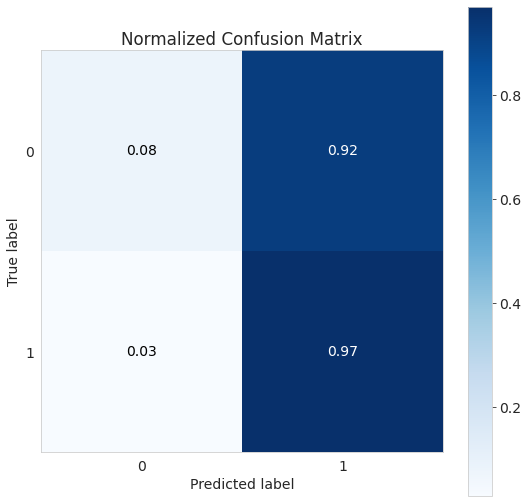

In [125]:
skplt.metrics.plot_confusion_matrix(y_test, gnb_predict, normalize=True, figsize=(9,9))
plt.show()

### Learning Curve

KeyboardInterrupt: ignored

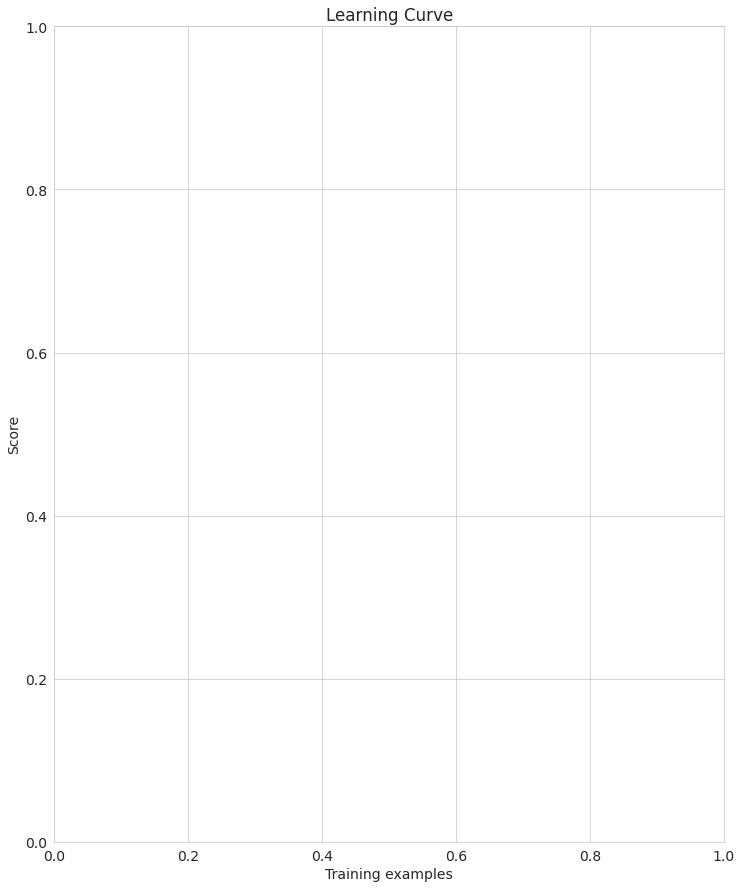

In [123]:
skplt.estimators.plot_learning_curve(rfc, X, y)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 6))

# Uncalibrated

rfc_probas = rfc.predict_proba(X_test)
y_test_predict_proba = clf.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='Uncalibrated')

# Calibrated
clf_sigmoid = CalibratedClassifierCV(clf, cv=3, method='isotonic')
clf_sigmoid.fit(X_train, y_train)
y_test_predict_proba = clf_sigmoid.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='red', label='Calibrated (Isotonic)')

# Calibrated, Platt
clf_sigmoid = CalibratedClassifierCV(clf, cv=3, method='sigmoid')
clf_sigmoid.fit(X_train, y_train)
y_test_predict_proba = clf_sigmoid.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='orange', label='Calibrated (Platt)')


plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().legend()
plt.title("$GaussianNB$ Sample Calibration Curve", fontsize=20); pass

## Gradient Booster Classifier

In [105]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_predict = gb.predict(X_test)

In [106]:
gb_cv_score = cross_val_score(gb, X, y, cv=10, scoring='roc_auc')

In [107]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, gb_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, gb_predict))
print('\n')
print("=== All AUC Scores ===")
print(gb_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Gradient Booster Classifier: ", gb_cv_score.mean())

=== Confusion Matrix ===
[[42779   401]
 [ 5541   737]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     43180
           1       0.65      0.12      0.20      6278

    accuracy                           0.88     49458
   macro avg       0.77      0.55      0.57     49458
weighted avg       0.86      0.88      0.84     49458



=== All AUC Scores ===
[0.78666903 0.78032098 0.77393187 0.78451059 0.76576999 0.78283067
 0.78013605 0.77774818 0.78518102 0.78259543]


=== Mean AUC Score ===
Mean AUC Score - Gradient Booster Classifier:  0.7799693795145941


In [108]:
gb.score(X_test, y_test)

0.8798576570019006

In [109]:
gb.score(X_train, y_train)

0.8854331610448847

## Naive Bayes

In [110]:
gnb = GaussianNB()

In [111]:
#y_pred = gnb.fit(X_train, y_train).predict(X_test)

gnb.fit(X_train,y_train)
# predictions
gnb_predict = gnb.predict(X_test)

In [112]:
gnb.score(X_train, y_train)

0.19360043022317827

In [113]:
gnb.score(X_test,y_test)

0.19659104694892637

In [114]:
gnb_cv_score = cross_val_score(gnb, X, y, cv=10, scoring='roc_auc')

In [115]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, gnb_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, gnb_predict))
print('\n')
print("=== All AUC Scores ===")
print(gnb_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Naive Bayes: ", gnb_cv_score.mean())

=== Confusion Matrix ===
[[ 3632 39548]
 [  187  6091]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.08      0.15     43180
           1       0.13      0.97      0.23      6278

    accuracy                           0.20     49458
   macro avg       0.54      0.53      0.19     49458
weighted avg       0.85      0.20      0.16     49458



=== All AUC Scores ===
[0.56141076 0.64080751 0.59449129 0.54919863 0.57286261 0.55053552
 0.57057201 0.56593731 0.55970792 0.63313791]


=== Mean AUC Score ===
Mean AUC Score - Naive Bayes:  0.5798661476620639


In [ ]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != gnb_predict).sum()))

In [ ]:
# https://towardsdatascience.com/implementing-naive-bayes-in-2-minutes-with-python-3ecd788803fe

# fitting (??)
# train stats
means = X_train.groupby(y_train).apply(np.mean)
stds = X_train.groupby(y_train).apply(np.std)

# class prior probabilities
probs = X_train.groupby(y_train).apply(lambda x: len(x))/X_train.shape[0]

# Model Analysis

## AUC-ROC Curve

https://gsarantitis.wordpress.com/2020/04/29/auc-roc-gains-chart-and-lift-curve-explained-with-business-implications/

In [126]:
#Build Random Forest model
# X_train, X_test, y_train, y_test 

model1 = RandomForestClassifier(max_depth=4, n_estimators = 20)
model1.fit(X_train,y_train)
model2 = RandomForestClassifier(max_depth=12, n_estimators = 120)
model2.fit(X_train,y_train)
 
#Predict test set
pred1 = rfc.predict_proba(X_test)
pred2 = gb.predict_proba(X_test)
 
#Plot AUC-ROC
fpr1, tpr1, threshold1 = roc_curve(y_test, pred1[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, pred2[:,1])
roc_auc2 = auc(fpr2, tpr2)

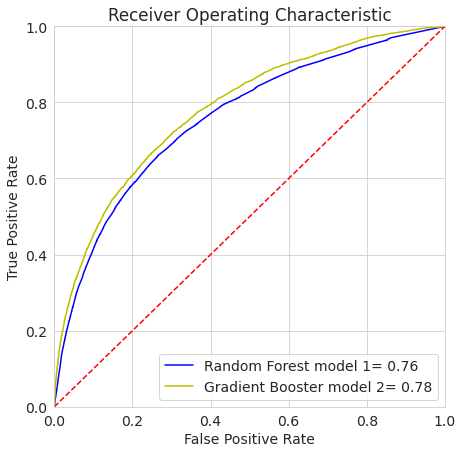

In [128]:
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'Random Forest model 1= %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'y', label = 'Gradient Booster model 2= %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Cumulative gains chart

https://gsarantitis.wordpress.com/2020/04/29/auc-roc-gains-chart-and-lift-curve-explained-with-business-implications/

<Figure size 504x504 with 0 Axes>

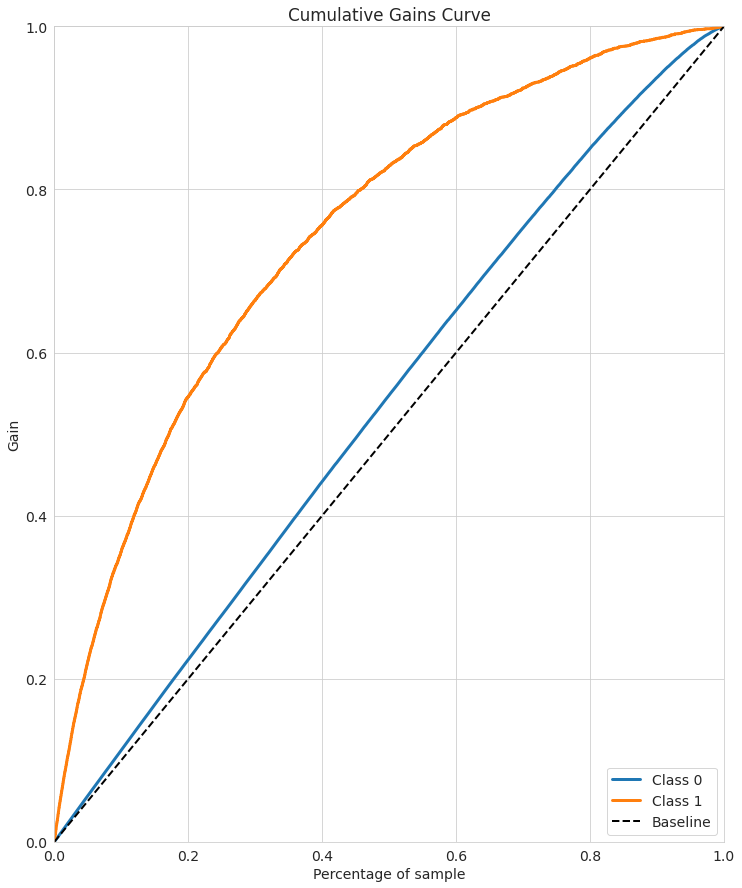

In [129]:
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, pred2)
plt.show()

#skplt.metrics.plot_cumulative_gain()

## Lift Chart

https://gsarantitis.wordpress.com/2020/04/29/auc-roc-gains-chart-and-lift-curve-explained-with-business-implications/

<Figure size 504x504 with 0 Axes>

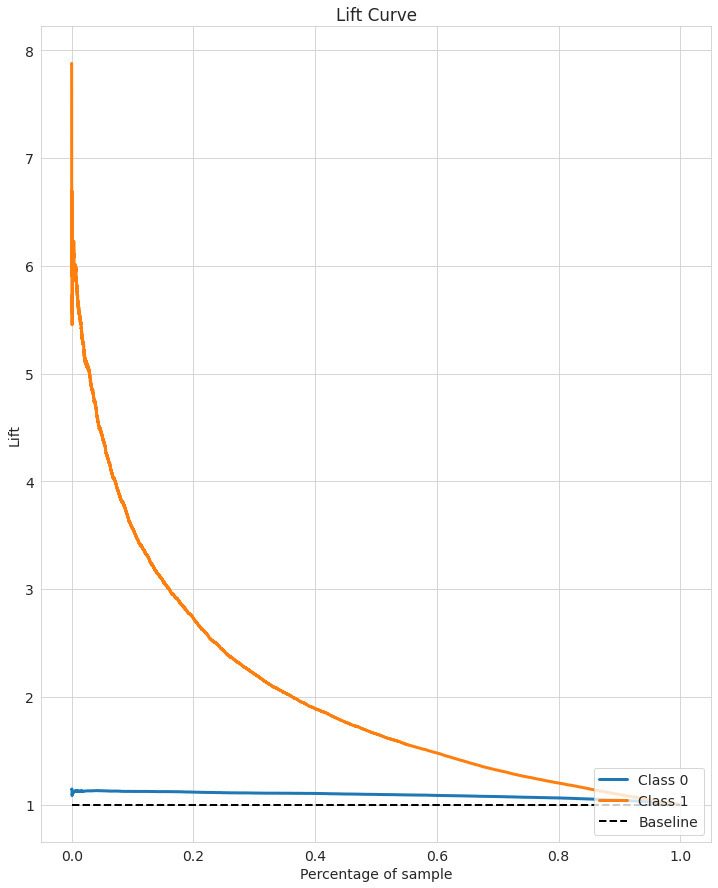

In [132]:
plt.figure(figsize=(7,7))
skplt.metrics.plot_lift_curve(y_test, pred2)
plt.show()

## Propensity Risk Score - Could not get to work!

https://medium.com/@bmiroglio/introducing-the-pymatch-package-6a8c020e2009

In [ ]:
!pip install pymatch

  Created wheel for pymatch: filename=pymatch-0.3.4-cp36-none-any.whl size=9117 sha256=d882006571de0ceeac9b72dae75c079358b9cffb8bab68260cf5f46d8872fa35
  Stored in directory: /root/.cache/pip/wheels/95/c4/23/2d06fb55633c2fc4b416d12f1881486a876c0e0cfce8b9cd6f
Successfully built pymatch


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from pymatch.Matcher import Matcher

In [ ]:
# Need to drop some zero only columns that cause an error when fitting...

df2 = df.drop(['IMPAIRED_BLIND','BDYTYP_IM_42','BDYTYP_IM_94','BDYTYP_IM_86','BDYTYP_IM_87','CF_7','EVENT1_IM_55'], axis=1)

In [ ]:
# No severe accident will be the control group.  What about those accidents that were severe is different?

test = df2[df2.SEV_ACC == 1]
control = df2[df2.SEV_ACC == 0]

In [ ]:
m = Matcher(test, control, yvar="SEV_ACC", exclude=[])

# This does show an imbalance in non-severe versus severe accidents... So we need to sample equally from each, as shown below

Formula:
SEV_ACC ~ CF_3+CF_5+CF_13+CF_14+CF_15+CF_16+CF_17+CF_19+CF_20+CF_21+CF_23+CF_24+CF_25+CF_26+CF_27+CF_28+LGTCON_IM_1+LGTCON_IM_2+LGTCON_IM_3+LGTCON_IM_4+LGTCON_IM_5+LGTCON_IM_6+LGTCON_IM_7+EVENT1_IM_1+EVENT1_IM_2+EVENT1_IM_3+EVENT1_IM_5+EVENT1_IM_6+EVENT1_IM_7+EVENT1_IM_8+EVENT1_IM_9+EVENT1_IM_10+EVENT1_IM_11+EVENT1_IM_12+EVENT1_IM_14+EVENT1_IM_15+EVENT1_IM_16+EVENT1_IM_17+EVENT1_IM_18+EVENT1_IM_19+EVENT1_IM_20+EVENT1_IM_21+EVENT1_IM_23+EVENT1_IM_24+EVENT1_IM_25+EVENT1_IM_26+EVENT1_IM_30+EVENT1_IM_31+EVENT1_IM_32+EVENT1_IM_33+EVENT1_IM_34+EVENT1_IM_35+EVENT1_IM_38+EVENT1_IM_39+EVENT1_IM_40+EVENT1_IM_41+EVENT1_IM_42+EVENT1_IM_43+EVENT1_IM_44+EVENT1_IM_45+EVENT1_IM_46+EVENT1_IM_48+EVENT1_IM_49+EVENT1_IM_50+EVENT1_IM_51+EVENT1_IM_52+EVENT1_IM_53+EVENT1_IM_54+EVENT1_IM_57+EVENT1_IM_58+EVENT1_IM_59+EVENT1_IM_72+EVENT1_IM_73+EVENT1_IM_74+EVENT1_IM_91+EVENT1_IM_93+TYP_INT_1+TYP_INT_2+TYP_INT_3+TYP_INT_4+TYP_INT_5+TYP_INT_6+TYP_INT_7+TYP_INT_10+REL_ROAD_1+REL_ROAD_2+REL_ROAD_3+REL_ROAD

In [ ]:
np.random.seed(20170925)
m.fit_scores(balance=True, nmodels=100)

Fitting Models on Balanced Samples: 1\100

ValueError: ignored

In [ ]:
m.predict_scores()

IndexError: ignored

## Calibration Curve

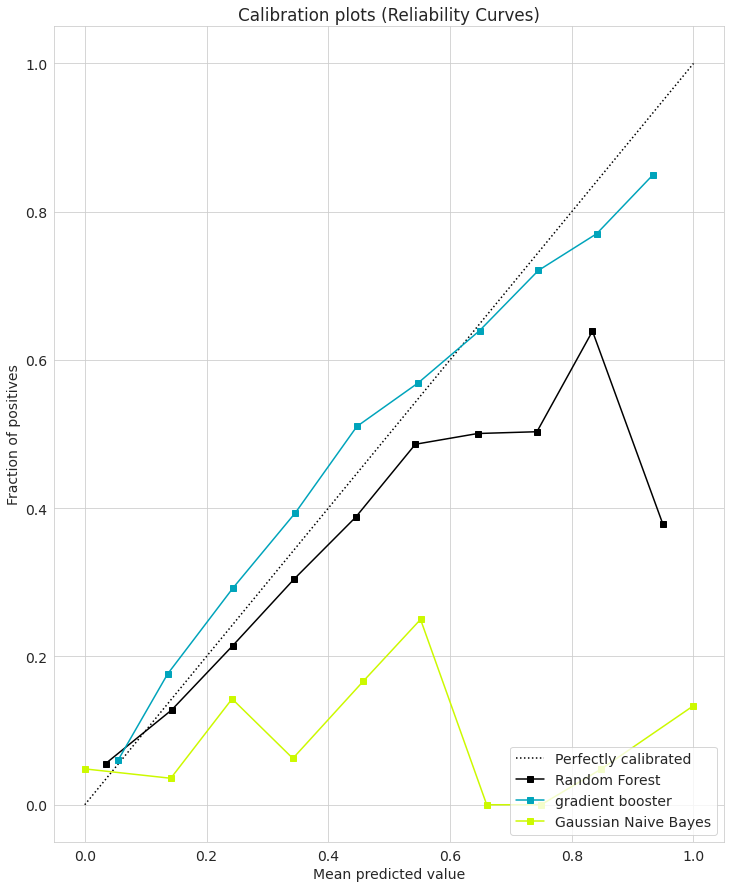

In [130]:


rfc_probas = rfc.predict_proba(X_test)
gb_probas = gb.predict_proba(X_test)
gnb_probas = gnb.predict_proba(X_test)
probas_list = [rfc_probas, gb_probas, gnb_probas]
clf_names = ['Random Forest', 'gradient booster','Gaussian Naive Bayes']
skplt.metrics.plot_calibration_curve(y_test, probas_list,clf_names)
plt.show()



```
# This is formatted as code
```

# MODEL PREDICTION

## Prediction

In [ ]:
X_test.iloc[0]

In [116]:
print ("naive bayes", gnb.predict(np.array(X_test.iloc[0]).reshape(1, -1)))

naive bayes [1]


In [117]:
print ("random forest", rfc.predict(np.array(X_test.iloc[0]).reshape(1, -1)))

random forest [0]


In [118]:
print ("gradient boost", gb.predict(np.array(X_test.iloc[0]).reshape(1, -1)))

gradient boost [0]


## Export Model (Pkl)

In [119]:
import joblib

In [121]:
# Let's export the models for use in a web app

# Naive Bayes model

joblib.dump(gnb, '/content/drive/My Drive/Colab Notebooks/gnb.pkl', compress=True)

# Random Forest Classifier model

joblib.dump(gnb, '/content/drive/My Drive/Colab Notebooks/rfc.pkl', compress=True)

# Gradient Booster model

joblib.dump(gb, '/content/drive/My Drive/Colab Notebooks/gb.pkl', compress=True)

print("done")

done


In [135]:
df.head()

,SEV_ACC,CF_3,CF_5,CF_7,CF_13,CF_14,CF_15,CF_16,CF_17,CF_19,CF_20,CF_21,CF_23,CF_24,CF_25,CF_26,CF_27,CF_28,LGTCON_IM_1,LGTCON_IM_2,LGTCON_IM_3,LGTCON_IM_4,LGTCON_IM_5,LGTCON_IM_6,LGTCON_IM_7,TYP_INT_1,TYP_INT_2,TYP_INT_3,TYP_INT_4,TYP_INT_5,TYP_INT_6,TYP_INT_7,TYP_INT_10,REL_ROAD_1,REL_ROAD_2,REL_ROAD_3,REL_ROAD_4,REL_ROAD_5,REL_ROAD_6,REL_ROAD_7,REL_ROAD_8,REL_ROAD_10,REL_ROAD_11,WRK_ZONE_0,WRK_ZONE_1,WRK_ZONE_2,WRK_ZONE_3,WEATHR_IM_1,WEATHR_IM_2,WEATHR_IM_3,WEATHR_IM_4,WEATHR_IM_5,WEATHR_IM_6,WEATHR_IM_7,WEATHR_IM_8,WEATHR_IM_10,WEATHR_IM_11,WEATHR_IM_12,ALCHL_IM_1,ALCHL_IM_2,URBANICITY_1,URBANICITY_2,OLD_CAR,SPD_L30MPH,SPD_30_65MPH,SPD_G65MPH,BDYTYP_IM_1,BDYTYP_IM_2,BDYTYP_IM_3,BDYTYP_IM_4,BDYTYP_IM_5,BDYTYP_IM_6,BDYTYP_IM_7,BDYTYP_IM_8,BDYTYP_IM_9,BDYTYP_IM_10,BDYTYP_IM_11,BDYTYP_IM_12,BDYTYP_IM_13,BDYTYP_IM_14,BDYTYP_IM_15,BDYTYP_IM_16,BDYTYP_IM_17,BDYTYP_IM_19,BDYTYP_IM_20,BDYTYP_IM_21,BDYTYP_IM_22,BDYTYP_IM_28,BDYTYP_IM_29,BDYTYP_IM_30,BDYTYP_IM_31,BDYTYP_IM_32,BDYTYP_IM_34,BDYTYP_IM_39,BDYTYP_IM_40,BDYTYP_IM_41,BDYTYP_IM_42,BDYTYP_IM_45,BDYTYP_IM_48,BDYTYP_IM_50,BDYTYP_IM_51,BDYTYP_IM_52,BDYTYP_IM_55,BDYTYP_IM_58,BDYTYP_IM_59,BDYTYP_IM_60,BDYTYP_IM_61,BDYTYP_IM_62,BDYTYP_IM_63,BDYTYP_IM_64,BDYTYP_IM_65,BDYTYP_IM_66,BDYTYP_IM_67,BDYTYP_IM_71,BDYTYP_IM_72,BDYTYP_IM_73,BDYTYP_IM_78,BDYTYP_IM_80,BDYTYP_IM_81,BDYTYP_IM_82,BDYTYP_IM_83,BDYTYP_IM_84,BDYTYP_IM_85,BDYTYP_IM_86,BDYTYP_IM_87,BDYTYP_IM_88,BDYTYP_IM_89,BDYTYP_IM_90,BDYTYP_IM_91,BDYTYP_IM_92,BDYTYP_IM_93,BDYTYP_IM_94,BDYTYP_IM_95,BDYTYP_IM_96,BDYTYP_IM_97,SPEEDREL_0,SPEEDREL_2,SPEEDREL_3,SPEEDREL_4,SPEEDREL_5,VALIGN_0,VALIGN_1,VALIGN_2,VALIGN_3,VALIGN_4,VPROFILE_0,VPROFILE_1,VPROFILE_2,VPROFILE_3,VPROFILE_4,VPROFILE_5,VPROFILE_6,VSURCOND_0,VSURCOND_1,VSURCOND_2,VSURCOND_3,VSURCOND_4,VSURCOND_5,VSURCOND_6,VSURCOND_7,VSURCOND_8,VSURCOND_10,VSURCOND_11,PCRASH1_IM_0,PCRASH1_IM_1,PCRASH1_IM_2,PCRASH1_IM_3,PCRASH1_IM_4,PCRASH1_IM_5,PCRASH1_IM_6,PCRASH1_IM_7,PCRASH1_IM_8,PCRASH1_IM_9,PCRASH1_IM_10,PCRASH1_IM_11,PCRASH1_IM_12,PCRASH1_IM_13,PCRASH1_IM_14,PCRASH1_IM_15,PCRASH1_IM_16,PCRASH1_IM_17,PCRASH1_IM_98,DR_SF_6,DR_SF_8,DR_SF_9,DR_SF_10,DR_SF_16,DR_SF_18,DR_SF_20,DR_SF_21,DR_SF_22,DR_SF_23,DR_SF_24,DR_SF_32,DR_SF_36,DR_SF_37,DR_SF_50,DR_SF_51,DR_SF_54,DR_SF_55,DR_SF_56,DR_SF_57,DR_SF_58,DR_SF_59,DR_SF_60,DR_SF_91,IMPAIRED_NONE,IMPAIRED_BLACKOUT,IMPAIRED_ASLEEP,IMPAIRED_CANE,IMPAIRED_PARAPALEGIC,IMPAIRED_PREINJ,IMPAIRED_DEAF,IMPAIRED_BLIND,IMPAIRED_EMOTIONAL,IMPAIRED_DUI,IMPAIRED_PHY_UNK,IMPAIRED_NO_DRIVER,IMPAIRED_OTHER,REST_USE_0,REST_USE_1,REST_USE_2,REST_USE_3,REST_USE_4,REST_USE_5,REST_USE_7,REST_USE_8,REST_USE_10,REST_USE_11,REST_USE_12,REST_USE_16,REST_USE_17,REST_USE_19,REST_USE_20,REST_USE_29,REST_USE_96,REST_USE_97,REST_MIS_0,REST_MIS_1,DRUGS_0,DRUGS_1,MFACTOR_0,MFACTOR_1,MFACTOR_2,MFACTOR_3,MFACTOR_4,MFACTOR_5,MFACTOR_6,MFACTOR_7,MFACTOR_8,MFACTOR_9,MFACTOR_10,MFACTOR_11,MFACTOR_12,MFACTOR_13,MFACTOR_14,MFACTOR_15,MFACTOR_16,MFACTOR_17,MFACTOR_97,MDRDSTRD_0,MDRDSTRD_1,MDRDSTRD_3,MDRDSTRD_4,MDRDSTRD_5,MDRDSTRD_6,MDRDSTRD_7,MDRDSTRD_9,MDRDSTRD_10,MDRDSTRD_12,MDRDSTRD_13,MDRDSTRD_14,MDRDSTRD_15,MDRDSTRD_16,MDRDSTRD_17,MDRDSTRD_18,MDRDSTRD_19,MDRDSTRD_92,MDRDSTRD_93,MDRDSTRD_96,MDRDSTRD_97,MDRDSTRD_98
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
 
 VPROFILE_1,
                      VPROFILE_2, VPROFILE_3, VPROFILE_4, VPROFILE_5, VPROFILE_6, VSURCOND_0, VSURCOND_1, VSURCOND_2,
                      VSURCOND_3, VSURCOND_4, VSURCOND_5, VSURCOND_6, VSURCOND_7, VSURCOND_8, VSURCOND_10, VSURCOND_11,
                      PCRASH1_IM_0, PCRASH1_IM_1, PCRASH1_IM_2, PCRASH1_IM_3, PCRASH1_IM_4, PCRASH1_IM_5, PCRASH1_IM_6,
                      PCRASH1_IM_7, PCRASH1_IM_8, PCRASH1_IM_9, PCRASH1_IM_10, PCRASH1_IM_11, PCRASH1_IM_12,
                      PCRASH1_IM_13, PCRASH1_IM_14, PCRASH1_IM_15, PCRASH1_IM_16, PCRASH1_IM_17, PCRASH1_IM_98, DR_SF_6,
                      DR_SF_8, DR_SF_9, DR_SF_10, DR_SF_16, DR_SF_18, DR_SF_20, DR_SF_21, DR_SF_22, DR_SF_23, DR_SF_24,
                      DR_SF_32, DR_SF_36, DR_SF_37, DR_SF_50, DR_SF_51, DR_SF_54, DR_SF_55, DR_SF_56, DR_SF_57,
                      DR_SF_58, DR_SF_59, DR_SF_60, DR_SF_91, IMPAIRED_NONE, IMPAIRED_BLACKOUT, IMPAIRED_ASLEEP,
                      IMPAIRED_CANE, IMPAIRED_PARAPALEGIC, IMPAIRED_PREINJ, IMPAIRED_DEAF, IMPAIRED_BLIND,
                      IMPAIRED_EMOTIONAL, IMPAIRED_DUI, IMPAIRED_PHY_UNK, IMPAIRED_NO_DRIVER, IMPAIRED_OTHER, REST_USE_0, REST_USE_1, REST_USE_2, REST_USE_3,
                      REST_USE_4, REST_USE_5, REST_USE_7, REST_USE_8, REST_USE_10, REST_USE_11, REST_USE_12,
                      REST_USE_16, REST_USE_17, REST_USE_19, REST_USE_20, REST_USE_29, REST_USE_96, REST_USE_97,
                      REST_MIS_0, REST_MIS_1, DRUGS_0, DRUGS_1, MFACTOR_0, MFACTOR_1, MFACTOR_2, MFACTOR_3, MFACTOR_4,
                      MFACTOR_5, MFACTOR_6, MFACTOR_7, MFACTOR_8, MFACTOR_9, MFACTOR_10, MFACTOR_11, MFACTOR_12,
                      MFACTOR_13, MFACTOR_14, MFACTOR_15, MFACTOR_16, MFACTOR_17, MFACTOR_97, MDRDSTRD_0, MDRDSTRD_1,
                      MDRDSTRD_3, MDRDSTRD_4, MDRDSTRD_5, MDRDSTRD_6, MDRDSTRD_7, MDRDSTRD_9, MDRDSTRD_10, MDRDSTRD_12,
                      MDRDSTRD_13, MDRDSTRD_14, MDRDSTRD_15, MDRDSTRD_16, MDRDSTRD_17, MDRDSTRD_18, MDRDSTRD_19,
                      MDRDSTRD_92, MDRDSTRD_93, MDRDSTRD_96, MDRDSTRD_97, MDRDSTRD_98